In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data =pd.read_csv("StudentsPerformance.csv")

In [3]:
data.head(10)

# Requirement 2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
x = data.isnull().sum()

x

y= data.isna().sum()

y

# since sum of null values is zero, hence no missing value.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

math score          AxesSubplot(0.125,0.657941;0.227941x0.222059)
reading score    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
writing score    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dtype: object

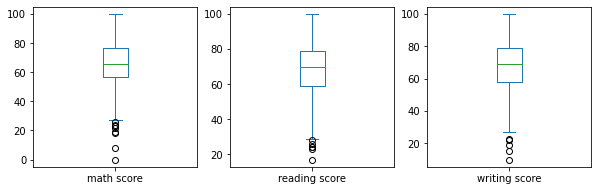

In [6]:
data.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10)) 

#there are outliers for all three

In [7]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
data[['math score']].describe()



,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


In [9]:
Q1ms= data['math score'].quantile(0.25)
Q3ms=data['math score'].quantile(0.75)
IQRms = Q3ms-Q1ms

In [10]:
lower_lim_ms = Q1ms-1.5*IQRms
upper_lim_ms= Q3ms+1.5*IQRms

In [11]:
lower_lim_ms

27.0

In [12]:
upper_lim_ms

107.0

In [13]:
#hence values above 107 and below 27 are outliers. 

In [14]:
outlier_low_ms = (data['math score'] < lower_lim_ms)
outlier_up_ms = (data['math score'] > upper_lim_ms)



In [15]:
outlier_low_ms


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [16]:
outlier_up_ms

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [17]:
data['math score'][~(outlier_low_ms | outlier_up_ms)]

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 992, dtype: int64

In [18]:
data['math score'] = data['math score'][~(outlier_low_ms|outlier_up_ms)]

math score    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

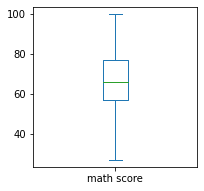

In [19]:
data['math score'].plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10)) 


reading score    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

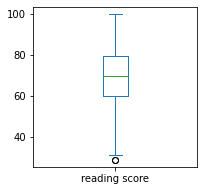

In [20]:
Q1rs = data['reading score'].quantile(0.25)
Q3rs = data['reading score'].quantile(0.75)
IQRrs= Q3rs - Q1rs
lower_lim_rs = Q1rs - 1.5*IQRrs
upper_lim_rs = Q3rs +1.5* IQRrs
outlier_low_rs= (data["reading score"]<lower_lim_rs)
outlier_up_rs= (data["reading score"]>upper_lim_rs)
data["reading score"] = data["reading score"][~(outlier_low_rs|outlier_up_rs)]
data["reading score"].plot(kind = "box", subplots = True, layout= (3,3), figsize=(10,10))


In [21]:
data["reading score"].describe()

count    994.000000
mean      69.443662
std       14.205560
min       29.000000
25%       60.000000
50%       70.000000
75%       79.750000
max      100.000000
Name: reading score, dtype: float64

writing score    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

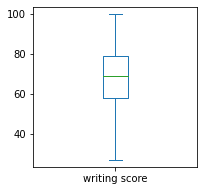

In [22]:
Q1ws = data['writing score'].quantile(0.25)
Q3ws = data['writing score'].quantile(0.75)
IQRws= Q3ws - Q1ws
lower_lim_ws = Q1ws - 1.5*IQRws
upper_lim_ws = Q3ws +1.5* IQRws
outlier_low_ws= (data["writing score"]<lower_lim_ws)
outlier_up_ws= (data["writing score"]>upper_lim_ws)
data["writing score"] = data["writing score"][~(outlier_low_ws|outlier_up_ws)]
data["writing score"].plot(kind = "box", subplots = True, layout= (3,3), figsize=(10,10))

math score          AxesSubplot(0.125,0.657941;0.227941x0.222059)
reading score    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
writing score    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dtype: object

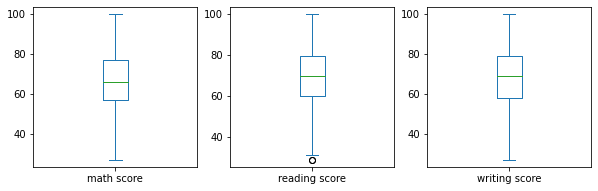

In [23]:
data.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10)) 

In [24]:
#for Descriptive Statistics.

stats = data.describe(include='all')
print(stats)

data["race/ethnicity"].unique()

data["parental level of education"].unique()

data["lunch"].unique()
data["test preparation course"].unique()

#In total of 1000 students, there are 5 race/ethnicities (Group A,B,C,D,E) of students, Group C having the most number of students. Most of the student's gender is "female", rest is "male". Their parents had 6 types of education("bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'), and most were from "some college". Among 2 types of lunch('standard', 'free/reduced'), most students preferred 'standard' ones. 
#As for the course test, some were prepared and some were incomplete. Min score for math,reading, writing were 27, 31, 27 consecutively, and max was 100. But 50% of the students scored 66,70,69 consecutively in that order.  

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  992.000000     994.000000     995.000000

array(['none', 'completed'], dtype=object)

In [25]:
#To find data types
data_type= data.dtypes
print(data_type)

#gender, race/ethnicity,parental level of education, lunch are all object type, while the scores for math,reading, writing are float64 types. 

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


In [26]:
data.groupby(['gender','race/ethnicity']).describe() 


math score                                           \
                           count       mean        std   min    25%   50%   
gender race/ethnicity                                                       
female group A              36.0  58.527778  14.157252  34.0  48.75  57.0   
       group B              99.0  63.575758  13.304204  32.0  53.00  63.0   
       group C             178.0  62.606742  14.022676  29.0  54.00  63.5   
       group D             128.0  65.554688  13.793647  27.0  56.75  65.5   
       group E              69.0  70.811594  16.269129  32.0  61.00  71.0   
male   group A              53.0  63.735849  14.520742  28.0  53.00  63.0   
       group B              86.0  65.930233  14.156928  30.0  57.25  65.0   
       group C             139.0  67.611511  14.090037  27.0  58.00  68.0   
       group D             133.0  69.413534  13.094139  39.0  61.00  71.0   
       group E              71.0  76.746479  14.298570  30.0  68.50  78.0   

                                    reading score             ...         \
                         75%    max         count       mean  ...    75%   
gender race/ethnicity                                         ...          
female group A         68.25   92.0          36.0  69.000000  ...  82.25   
       group B         73.00   97.0         103.0  71.533981  ...  82.00   
       group C         71.00   96.0         179.0  72.251397  ...  81.50   
       group D         75.25   98.0         129.0  74.046512  ...  84.00   
       group E         81.00  100.0          69.0  75.840580  ...  86.00   
male   group A         72.00  100.0          52.0  62.480769  ...  72.00   
       group B         75.75   94.0          85.0  63.305882  ...  75.00   
       group C         78.00   98.0         138.0  65.695652  ...  75.00   
       group D         80.00  100.0         133.0  66.135338  ...  75.00   
       group E         87.00  100.0          70.0  70.928571  ...  80.75   

                             writing score                                     \
                         max         count       mean        std   min    25%   
gender race/ethnicity                                                           
female group A         100.0          36.0  67.861111  14.652455  41.0  57.75   
       group B          97.0         103.0  70.504854  14.213273  27.0  63.00   
       group C         100.0         179.0  72.122905  14.103409  30.0  64.00   
       group D         100.0         129.0  75.023256  13.866814  32.0  65.00   
       group E         100.0          69.0  75.536232  15.703671  38.0  68.00   
male   group A          96.0          52.0  59.923077  14.191749  34.0  48.75   
       group B          96.0          85.0  60.752941  14.094837  27.0  51.00   
       group C         100.0         139.0  62.712230  13.647341  27.0  53.00   
       group D          97.0         133.0  65.413534  13.262574  34.0  56.00   
       group E         100.0          70.0  68.042857  12.378611  40.0  59.25   

                                           
                        50%    75%    max  
gender race/ethnicity                      
female group A         67.0  77.50   97.0  
       group B         72.0  80.00   96.0  
       group C         74.0  82.00  100.0  
       group D         76.0  83.00  100.0  
       group E         76.0  87.00  100.0  
male   group A         60.5  69.00   92.0  
       group B         60.0  70.00   92.0  
       group C         62.0  71.50   95.0  
       group D         67.0  75.00   99.0  
       group E         70.0  76.75  100.0  

[10 rows x 24 columns]

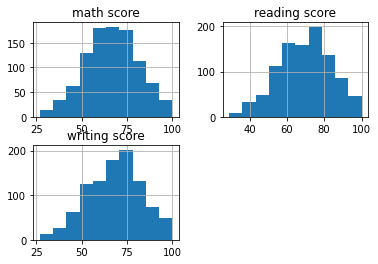

In [34]:
#histogram to show the distribution of the scores in math, reading, and writing. 
data.hist() 
plt.show() 

In [40]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


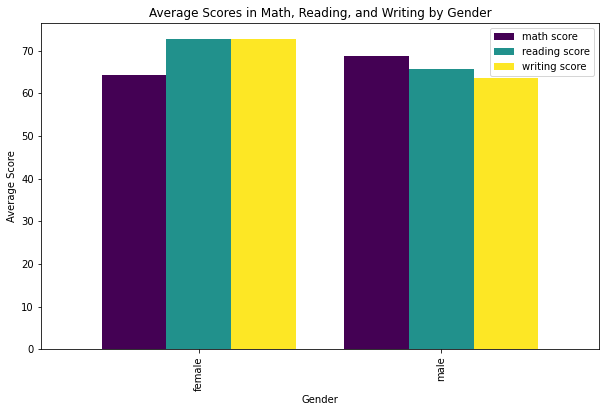

In [42]:
#finding avg score according to gender

avg_scores_gender = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()


avg_scores_gender.plot(kind='bar', width=0.8, figsize=(10, 6), colormap='viridis')


plt.title('Average Scores in Math, Reading, and Writing by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')


plt.show()

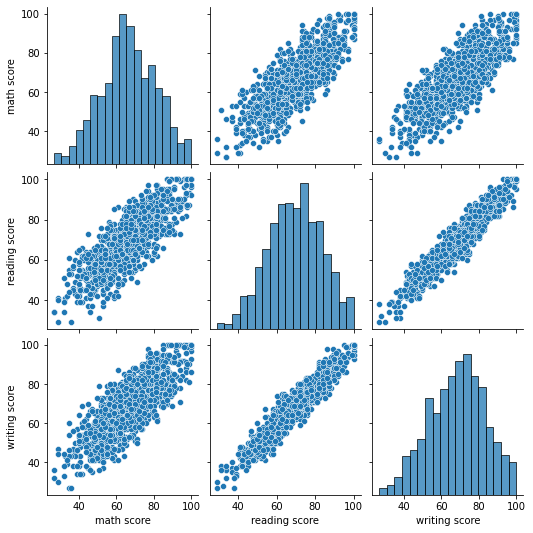

In [43]:
#Create a scatter plot to show the relationship between math, reading, and writing scores.
pairplot = sns.pairplot(data)

# Display the plot
plt.show()

In [44]:
# 5. Perform basic statistical analysis: 

#Calculate mean, median, and mode for math, reading, and writing scores:




mean_math = data['math score'].mean()
median_math = data['math score'].median()
mode_math = data['math score'].mode().iloc[0]  


mean_reading = data['reading score'].mean()
median_reading = data['reading score'].median()
mode_reading = data['reading score'].mode().iloc[0]


mean_writing = data['writing score'].mean()
median_writing = data['writing score'].median()
mode_writing = data['writing score'].mode().iloc[0]


print("Math Scores:")
print("Mean:", mean_math)
print("Median:", median_math)
print("Mode:", mode_math)
print("\nReading Scores:")
print("Mean:", mean_reading)
print("Median:", median_reading)
print("Mode:", mode_reading)
print("\nWriting Scores:")
print("Mean:", mean_writing)
print("Median:", median_writing)
print("Mode:", mode_writing)


Math Scores:
Mean: 66.48084677419355
Median: 66.0
Mode: 65.0

Reading Scores:
Mean: 69.44366197183099
Median: 70.0
Mode: 72.0

Writing Scores:
Mean: 68.30653266331659
Median: 69.0
Mode: 74.0


In [45]:
#Calculate the standard deviation for math, reading, and writing scores.
std_dev_math = data['math score'].std()
std_dev_reading = data['reading score'].std()
std_dev_writing = data['writing score'].std()

print("Math Scores Standard Deviation:", std_dev_math)
print("Reading Scores Standard Deviation:", std_dev_reading)
print("Writing Scores Standard Deviation:", std_dev_writing)


Math Scores Standard Deviation: 14.559999254579298
Reading Scores Standard Deviation: 14.205559847627073
Writing Scores Standard Deviation: 14.804952796327905


In [47]:
male_scores = data[data['gender'] == 'male']
female_scores = data[data['gender'] == 'female']


t_stat_math, p_value_math = stats.ttest_ind(male_scores['math score'], female_scores['math score'])
t_stat_reading, p_value_reading = stats.ttest_ind(male_scores['reading score'], female_scores['reading score'])
t_stat_writing, p_value_writing = stats.ttest_ind(male_scores['writing score'], female_scores['writing score'])


print("Math Scores:")
print("t-statistic:", t_stat_math)
print("p-value:", p_value_math)
print("\nReading Scores:")
print("t-statistic:", t_stat_reading)
print("p-value:", p_value_reading)
print("\nWriting Scores:")
print("t-statistic:", t_stat_writing)
print("p-value:", p_value_writing)

alpha = 0.05
if p_value_math < alpha:
    print("\nThere is a significant difference in math scores between male and female students.")
else:
    print("\nThere is no significant difference in math scores between male and female students.")

if p_value_reading < alpha:
    print("There is a significant difference in reading scores between male and female students.")
else:
    print("There is no significant difference in reading scores between male and female students.")

if p_value_writing < alpha:
    print("There is a significant difference in writing scores between male and female students.")
else:
    print("There is no significant difference in writing scores between male and female students.")

Math Scores:
t-statistic: nan
p-value: nan

Reading Scores:
t-statistic: nan
p-value: nan

Writing Scores:
t-statistic: nan
p-value: nan

There is no significant difference in math scores between male and female students.
There is no significant difference in reading scores between male and female students.
There is no significant difference in writing scores between male and female students.
